In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
pd.set_option("display.max_columns",50)

In [3]:
df=pd.read_csv(r"D:\data visualization\Sales_Data.csv")
df.head()

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_SellingPrice,Unit_MakingCost,Total_Revenue,Total_Cost,Total_Profit
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,12/20/2013,957081544.0,01-11-2014,552,255.28,159.42,140914.56,87999.84,52914.72
1,Central America and the Caribbean,Panama,Snacks,Offline,C,07-05-2010,301644504.0,7/26/2010,2167,152.58,97.44,330640.86,211152.48,119488.38
2,Europe,Czech Republic,Beverages,Offline,C,09-12-2011,478051030.0,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48
3,Asia,North Korea,Cereal,Offline,L,5/13/2010,892599952.0,6/15/2010,9016,205.70,117.11,1854591.20,1055863.76,798727.44
4,Asia,Sri Lanka,Snacks,Offline,C,7/20/2015,571902596.0,7/27/2015,7542,152.58,97.44,1150758.36,734892.48,415865.88


In [4]:
print("Shape:",df.shape)
print("\nColumns:",list(df.columns))
df.info()

Shape: (5000, 14)

Columns: ['Region', 'Country', 'Item_Type', 'Sales_Channel', 'Order_Priority', 'Order_Date', 'Order_ID', 'Ship_Date', 'Units_Sold', 'Unit_SellingPrice', 'Unit_MakingCost', 'Total_Revenue', 'Total_Cost', 'Total_Profit']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             5000 non-null   object 
 1   Country            5000 non-null   object 
 2   Item_Type          4989 non-null   object 
 3   Sales_Channel      5000 non-null   object 
 4   Order_Priority     5000 non-null   object 
 5   Order_Date         5000 non-null   object 
 6   Order_ID           4997 non-null   float64
 7   Ship_Date          5000 non-null   object 
 8   Units_Sold         5000 non-null   int64  
 9   Unit_SellingPrice  5000 non-null   float64
 10  Unit_MakingCost    5000 non-null   float64
 11  Total_Revenue      5000 no

In [5]:
df.isna().sum().sort_values(ascending=False).head(20)

Item_Type            11
Order_ID              3
Region                0
Country               0
Sales_Channel         0
Order_Priority        0
Order_Date            0
Ship_Date             0
Units_Sold            0
Unit_SellingPrice     0
Unit_MakingCost       0
Total_Revenue         0
Total_Cost            0
Total_Profit          0
dtype: int64

In [6]:
df["Order_Date"]=pd.to_datetime(df["Order_Date"],errors="coerce")
df["Ship_Date"]=pd.to_datetime(df["Ship_Date"],errors="coerce")
df["Order_Year"]=df["Order_Date"].dt.year
df["Order_Month"]=df["Order_Date"].dt.month
df["Order_YearMonth"]=df["Order_Date"].dt.to_period("M").astype(str)
df[["Order_Date","Ship_Date","Order_Year","Order_Month","Order_YearMonth"]].head()


,Order_Date,Ship_Date,Order_Year,Order_Month,Order_YearMonth
0,2013-12-20,2014-01-11,2013.0,12.0,2013-12
1,NaT,NaT,NaN,NaN,NaT
2,NaT,NaT,NaN,NaN,NaT
3,2010-05-13,NaT,2010.0,5.0,2010-05
4,2015-07-20,NaT,2015.0,7.0,2015-07


In [7]:
monthly=(
    df.groupby("Order_Year",as_index=False)["Units_Sold"]
    .sum()
    .sort_values("Order_Year")
)
monthly.head()

,Order_Year,Units_Sold
0,2010.0,1976592
1,2011.0,2023393
2,2012.0,2111040
3,2013.0,2008702
4,2014.0,1915167


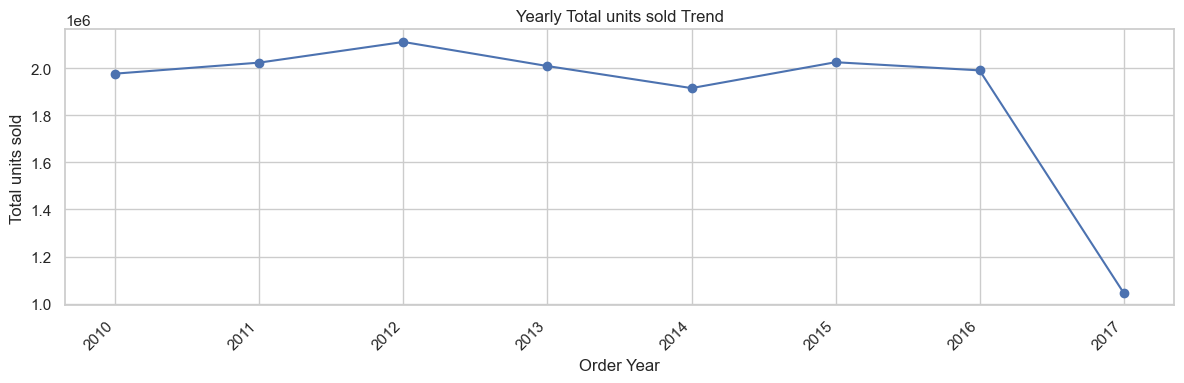

In [8]:

plt.figure(figsize=(12,4)) 
plt.plot(monthly["Order_Year"], monthly["Units_Sold"], marker="o") 
plt.title("Yearly Total units sold Trend")
plt.xlabel("Order Year")
plt.ylabel("Total units sold")

step = max(1, len(monthly)//12)
plt.xticks(monthly["Order_Year"][::step], rotation=45, ha="right")

plt.grid(True)
plt.tight_layout() 
plt.show()

In [9]:
region_rev=(
    df.groupby("Region", as_index=False)["Total_Revenue"]
    .sum()
    .sort_values("Total_Revenue",ascending=False)
)
region_rev.head()

,Region,Total_Revenue
6,Sub-Saharan Africa,1.814567e+09
3,Europe,1.703622e+09
0,Asia,9.202771e+08
4,Middle East and North Africa,7.668678e+08
2,Central America and the Caribbean,6.849763e+08


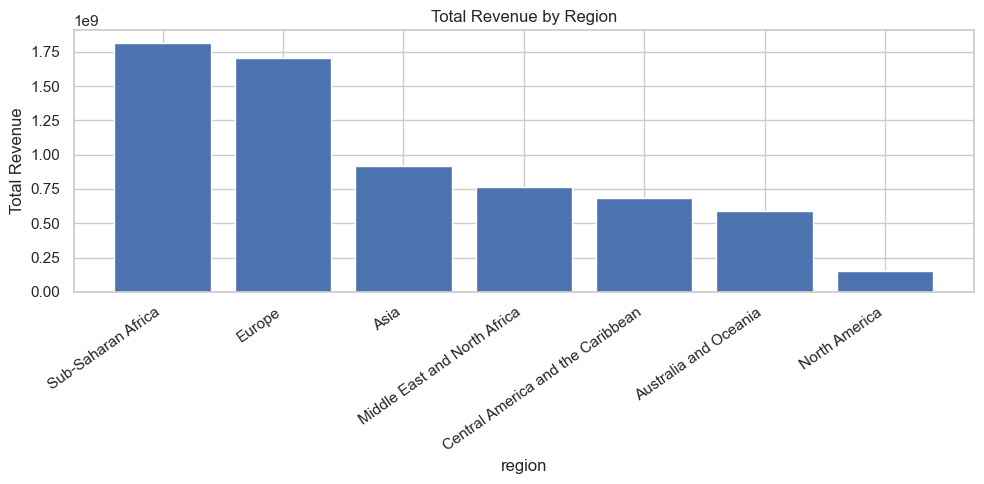

In [10]:
plt.figure(figsize=(10,5))
plt.bar(region_rev["Region"],region_rev["Total_Revenue"])
plt.title("Total Revenue by Region")
plt.xlabel("region")
plt.ylabel("Total Revenue")
plt.xticks(rotation=35,ha="right")
plt.tight_layout()
plt.show()